# **Task 1 : Introduction**

**1.1: Installing Libraries**

In [1]:
!pip install pandas matplotlib numpy scikit-surprise

     |████████████████████████████████| 11.8MB 2.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670903 sha256=70d6f22efe5f3d01c279e1fca9b8e5e090524f7aea630532ce5c1f7633f51b44
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


**1.2: Importing Libraries**

In [2]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

# **Task 2 : Importing Data**

**2.1: Importing the Data**

In [4]:
path = 'https://raw.githubusercontent.com/gourisnair/Datasets/master/ratings.csv'
df = pd.read_csv(path)
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**2.2: Dropping timestamp**

In [6]:
df.drop('timestamp', axis = 1, inplace = True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


**2.3: Check for Missing Data**

In [7]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

# **Task 3 : EDA(Exploratory Data Analysis)**

**3.1: Number of movies/users**

In [9]:
n_movies = df['movieId'].nunique()
n_users = df['userId'].nunique()
print(n_movies)
print(n_users)

9724
610


**3.2: Sparsity of our data**

Sparsity (%) = (No of missing values/ (Total Values))*100


In [10]:
available_ratings = df['rating'].count()
total_ratings = n_movies*n_users
missing_ratings = total_ratings - available_ratings
sparsity = (missing_ratings / total_ratings)*100
sparsity

98.30003169443864

**3.3: Ratings Distribution**

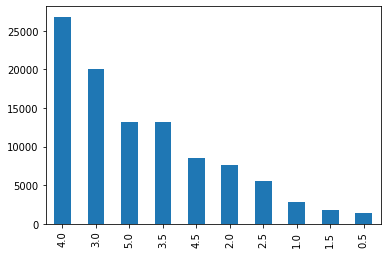

In [11]:
df['rating'].value_counts().plot(kind = 'bar')

# **Task 4 : Dimentionality Reduction**

**4.1: Filter movies with less than 3 ratings**

In [13]:
filter_movies = df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()
print(filter_movies)

[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527, 2959, 1, 1196, 2858, 50, 47, 780, 150, 1198, 4993, 1210, 858, 457, 592, 5952, 2028, 7153, 588, 608, 2762, 380, 32, 364, 1270, 377, 4306, 3578, 1580, 590, 648, 344, 4226, 367, 6539, 58559, 595, 1214, 1036, 500, 165, 79132, 1265, 1197, 6377, 1704, 2628, 1291, 1721, 316, 153, 1136, 597, 293, 1193, 3793, 231, 4886, 10, 6874, 1089, 7361, 1240, 1221, 2329, 34, 1213, 1200, 1682, 8961, 541, 736, 4995, 1097, 5349, 2683, 733, 1206, 5445, 4973, 2716, 1073, 4963, 33794, 586, 1527, 5989, 587, 208, 1968, 5418, 185, 3147, 3996, 2, 7438, 349, 253, 1258, 4878, 924, 2918, 329, 2115, 1208, 48516, 4896, 539, 1732, 1923, 68954, 60069, 223, 111, 39, 357, 2706, 161, 778, 1222, 6, 5816, 454, 292, 434, 1517, 44191, 912, 4022, 104, 2997, 339, 750, 3114, 1617, 72998, 2987, 6365, 3949, 1961, 1784, 4027, 59315, 2502, 4011, 551, 8368, 288, 5378, 2396, 2355, 919, 1917, 8360, 1259, 3948, 2797, 1356, 2174, 1387, 1610, 48780, 1080, 21, 2012, 19, 68157, 2324, 2916, 261

**4.2: Filter users with less than 3 movies rated**

In [14]:
filter_users = df['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()
print(filter_users)

[414, 599, 474, 448, 274, 610, 68, 380, 606, 288, 249, 387, 182, 307, 603, 298, 177, 318, 232, 480, 608, 600, 590, 483, 105, 19, 305, 489, 111, 438, 217, 140, 477, 555, 91, 28, 219, 534, 89, 64, 226, 561, 18, 525, 57, 381, 368, 509, 469, 560, 462, 292, 597, 21, 42, 294, 160, 580, 596, 275, 202, 517, 45, 156, 514, 391, 567, 357, 103, 339, 62, 199, 125, 51, 132, 66, 313, 200, 221, 6, 453, 50, 425, 428, 573, 352, 84, 122, 382, 356, 239, 135, 365, 484, 104, 63, 325, 169, 290, 332, 495, 432, 187, 328, 222, 212, 330, 20, 282, 372, 434, 1, 594, 562, 198, 82, 186, 354, 312, 605, 41, 4, 304, 119, 563, 263, 73, 586, 220, 246, 452, 234, 385, 522, 280, 139, 570, 166, 317, 552, 607, 195, 520, 367, 479, 266, 153, 74, 279, 256, 167, 141, 95, 331, 80, 527, 410, 117, 587, 346, 216, 265, 577, 564, 33, 419, 475, 572, 334, 260, 326, 287, 7, 233, 247, 113, 100, 137, 408, 420, 351, 559, 129, 47, 10, 230, 424, 464, 210, 602, 15, 27, 184, 376, 377, 524, 52, 369, 268, 240, 144, 314, 482, 109, 254, 411, 409, 39

**4.3: Remove rarely rated movies and rarely rating users**

In [17]:
print(df.shape)
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print(df.shape)

(92394, 3)
(92394, 3)


# **Task 5 : Create Training and Test Sets**

**5.1: Columns used for training**

In [20]:
cols = ['userId', 'movieId', 'rating']

**5.2: Create surprise dataset**

In [23]:
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df[cols], reader)

**5.3: Create Train-set and Prediction-set**

In [24]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

# **Task 6 : Creating and training the model**

**6.1: Creating the model**

SVD(Singular Value Decomposition)

Interaction Matrix = A X B X C

In [25]:
algo = SVD(n_epochs = 25, verbose = True)

**6.2: Training the model**

In [26]:
cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
print("Training Done!")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

# **Task 7 : Predctions**

**7.1: Predict ratings for all pairs(user, items) that are NOT in the training set**

In [27]:
predictions = algo.test(antiset)

In [28]:
predictions[0]

Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

**7.2: Recommending top 3 movies based on predictions**

In [29]:
from collections import defaultdict
def get_top_n(predictions, n):
    top_n = defaultdict(list)
    for uid, iid, _, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    return top_n
    pass
top_n = get_top_n(predictions, n=3)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 1704, 68157]
2 [2360, 1136, 904]
3 [589, 79132, 1248]
4 [4306, 106642, 1097]
5 [2542, 1237, 904]
6 [1250, 1234, 246]
7 [1250, 908, 910]
8 [5952, 4993, 1272]
9 [318, 356, 858]
10 [318, 898, 1204]
11 [1089, 930, 58559]
12 [6, 47, 50]
13 [318, 1237, 1208]
14 [168252, 8874, 4993]
15 [922, 48516, 1283]
16 [1233, 48516, 1266]
17 [1262, 4973, 57669]
18 [1225, 6016, 1283]
19 [527, 318, 1204]
20 [1196, 750, 1210]
21 [1225, 930, 110]
22 [608, 1262, 1148]
23 [2959, 922, 1228]
24 [904, 1104, 34405]
25 [50, 110, 1196]
26 [4878, 1219, 1104]
27 [3435, 1283, 930]
28 [912, 1178, 112552]
29 [1283, 1276, 1104]
30 [50, 296, 356]
31 [260, 1283, 50]
32 [1283, 58559, 3429]
33 [56782, 904, 912]
34 [1221, 2288, 44199]
35 [1237, 930, 58559]
36 [750, 1283, 1204]
37 [2858, 2542, 904]
38 [260, 1250, 1210]
39 [1283, 1237, 1208]
40 [1197, 2028, 1136]
41 [1237, 898, 1281]
42 [4973, 58559, 4878]
43 [6, 50, 260]
44 [1136, 1089, 904]
45 [1206, 750, 1172]
46 [2959, 1172, 541]
47 [922, 50, 246]
48 [318, 260, 1196]